# IF-1018 Minería de Datos 

- Versiones de librerías, python 3.9
* Tensorflow: 2.16.2

In [5]:
#pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

2024-10-28 15:16:49.410856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Carga y preprocesa los datos del conjunto MNIST

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de los píxeles a un rango de 0 a 1 // caso de imagenes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

 **Construye el modelo de red neuronal.**

* Crea un modelo secuencial que incluya:
* Una capa de entrada (a través de `Flatten`) para transformar las imágenes de 28x28 píxeles en un vector.
* Dos capas ocultas con 128 neuronas cada una, usando la función de activación ReLU.
* Una capa de salida con 10 neuronas y una función de activación Softmax para clasificar en 10 categorías.

In [3]:
# Se genera el modelo
model = Sequential([
       Flatten(input_shape=(28, 28)),
       Dense(128, activation='relu'),
       Dense(246, activation='relu'),
       Dense(128, activation='relu'),
       Dense(64, activation='relu'),
       Dense(10, activation='softmax')
   ])

/usr/local/Caskroom/miniconda/base/envs/datamining/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- Utiliza el optimizador `adam`, `categorical_crossentropy` como función de pérdida y `accuracy` como métrica.

In [4]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 246)            │        31,734 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        31,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,736 (674.75 KB)

 Trainable params: 172,736 (674.75 KB)

 Non-trainable params: 0 (0.00 B)

- Entrena el modelo con `10 epochs` y un `batch size` de 32.

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8758 - loss: 0.4077 - val_accuracy: 0.9566 - val_loss: 0.1402
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9668 - loss: 0.1066 - val_accuracy: 0.9658 - val_loss: 0.1162
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9768 - loss: 0.0766 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9804 - loss: 0.0620 - val_accuracy: 0.9777 - val_loss: 0.0801
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9766 - val_loss: 0.0856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0412 - val_accuracy: 0.9777 - val_loss: 0.0821
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9782 - val_loss: 0.0754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0.

- Evalúa el modelo en el conjunto de prueba y muestra la precisión obtenida.

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1424
Precisión en el conjunto de prueba: 97.25%


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [23]:
# Generar predicciones para el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir predicciones en clases
y_true = np.argmax(y_test, axis=1)  # Convertir etiquetas en clases


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


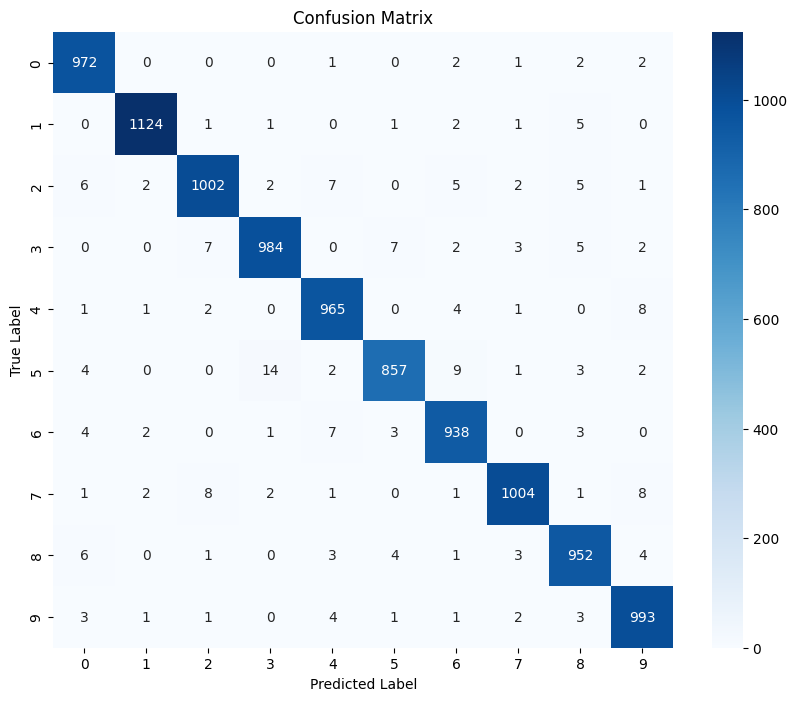

In [28]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# Calcular y mostrar el informe de clasificación
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



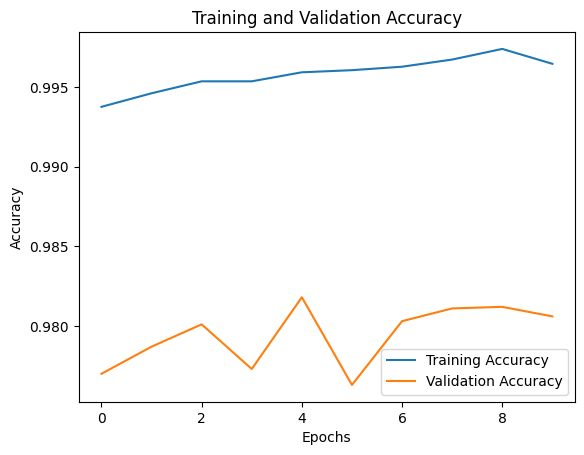

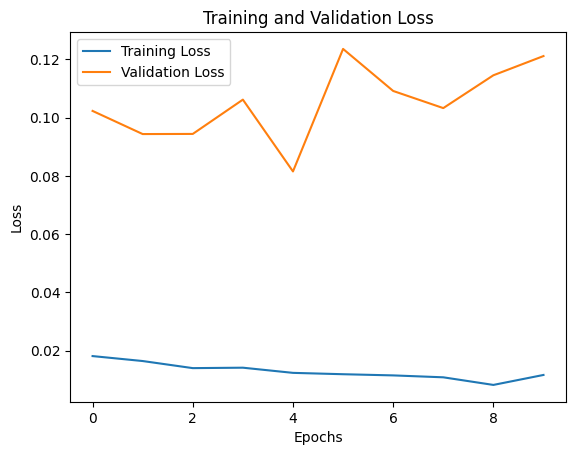

In [30]:
# Graficar precisión y pérdida durante el entrenamiento
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

# Graficar precisión
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


1. ¿Cómo cambia el rendimiento del modelo si utilizas la función de activación `tanh` en lugar de `relu` en las capas ocultas?
2. ¿Qué función de activación utilizarías si el problema fuera binario en lugar de multicategórico?
3. ¿Cómo podrías mejorar la precisión del modelo?